TRAINING CODE:


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Sample training images:


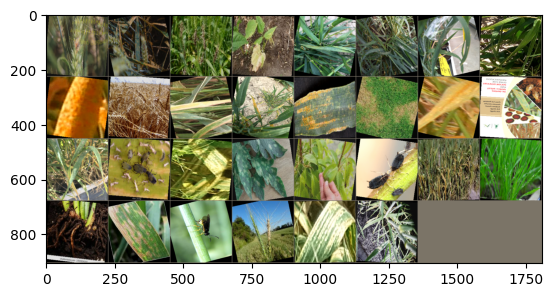

Labels: [ 5 10 11  4]


/tmp/ipykernel_30/132765357.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))
/tmp/ipykernel_30/132765357.py:96: Future

Model loaded successfully!
Epoch [1/10], Loss: 0.0975
Validation Loss: 0.7228, Accuracy: 93.00%
model saved after epoch 41
Completed epoch number! 41
Model loaded successfully!
Epoch [2/10], Loss: 0.0780
Validation Loss: 0.8016, Accuracy: 92.67%
model saved after epoch 42
Completed epoch number! 42
Model loaded successfully!
Epoch [3/10], Loss: 0.0713
Validation Loss: 0.7543, Accuracy: 92.67%
model saved after epoch 43
Completed epoch number! 43
Model loaded successfully!
Epoch [4/10], Loss: 0.0719
Validation Loss: 0.6802, Accuracy: 93.00%
model saved after epoch 44
Completed epoch number! 44
Model loaded successfully!
Epoch [5/10], Loss: 0.0709
Validation Loss: 0.8160, Accuracy: 92.67%
model saved after epoch 45
Completed epoch number! 45
Model loaded successfully!
Epoch [6/10], Loss: 0.0642
Validation Loss: 0.9080, Accuracy: 92.67%
model saved after epoch 46
Completed epoch number! 46
Model loaded successfully!
Epoch [7/10], Loss: 0.0615
Validation Loss: 0.9441, Accuracy: 93.00%
mode

In [9]:
import torch
import os
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np



train_dir = '/kaggle/input/wheat-plant-diseases/data/train'
val_dir = '/kaggle/input/wheat-plant-diseases/data/valid'
test_dir = '/kaggle/input/wheat-plant-diseases/data/test'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.resnet50(pretrained=True)
num_classes = 15
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

for epoch in range(num_epochs):

    scheduler.step()

def imshow(img):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
print("Sample training images:")
imshow(torchvision.utils.make_grid(images[:30]))
print("Labels:", labels[:4].numpy())

num_epochs = 10

checkpoint_path = '/kaggle/input/model-9/model_epoch_9'
model.load_state_dict(torch.load(checkpoint_path))

model.eval()

#current_iteration = 40
for epoch in range(num_epochs):
    
    model_path = f'/kaggle/working/model_epoch_{current_iteration}'
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        model.eval()
        print("Model loaded successfully!")
        model.train()  
        running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")


    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")
    current_iteration += 1
    torch.save(model.state_dict(), f'/kaggle/working/model_epoch_{current_iteration}')
    print('model saved after epoch',current_iteration )
    print('Completed epoch number!', current_iteration)
    scheduler.step()


print("Training complete.")



TESTING - 1

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_30/2481822159.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

Model loaded successfully!
Sample test images:


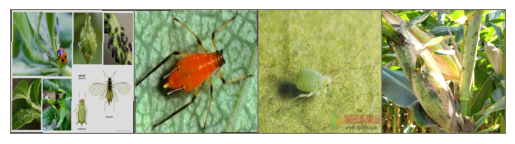

Labels: [0 0 0 0]
True
True
False
True
True
True
True
False
True
False
False
False
True
True
False
False
False
False
True
True
False
False
True
True


In [1]:
import torch
import os
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np

cpDir = '/kaggle/input/model-epoch-48/model_epoch_48'
test_dir = '/kaggle/input/wheat-plant-diseases/data/test'


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(1),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


if os.path.exists(cpDir):
    
    model = models.resnet50(pretrained=False)
    
    
    num_classes = 15
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
    

    model.load_state_dict(torch.load(cpDir))
    model.eval()
    print("Model loaded successfully!")
else:
    raise FileNotFoundError(f"Model checkpoint not found at {cpDir}")


dataiter = iter(test_loader)
images, labels = next(dataiter)

def imshow(img):
    """Display a tensor as an image."""
    img = img.numpy().transpose((1, 2, 0))
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print("Sample test images:")
imshow(torchvision.utils.make_grid(images[:4]))
print("Labels:", labels[:4].numpy())


with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        print(torch.equal(preds, labels))


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_30/312195940.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

Model loaded successfully!
Sample test images:


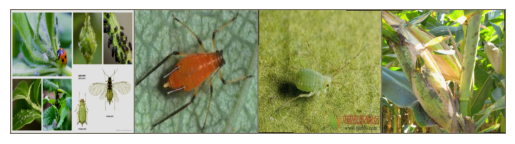

Labels (True class indices): [0 0 0 0]
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
P

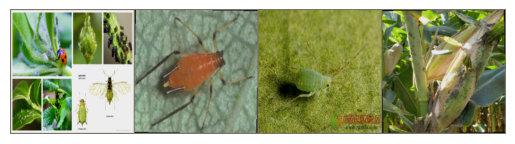

Predicted Labels: ['aphid_test', 'aphid_test', 'aphid_test', 'aphid_test']
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: aphid_test, True: aphid_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predi

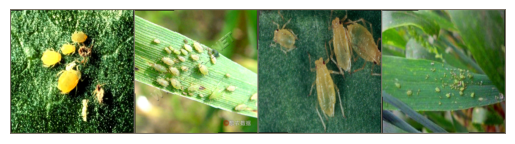

Predicted Labels: ['aphid_test', 'aphid_test', 'aphid_test', 'aphid_test']
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_tes

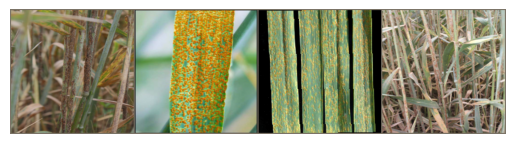

Predicted Labels: ['black_rust_test', 'black_rust_test', 'black_rust_test', 'black_rust_test']
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: black_rust_test, True: black_rust_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, Tr

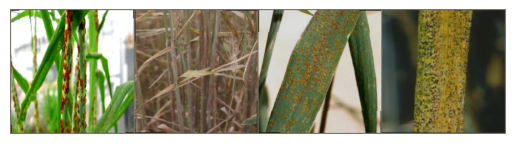

Predicted Labels: ['black_rust_test', 'black_rust_test', 'black_rust_test', 'black_rust_test']
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: blast_test, True: blast_test
Predicted: brown_rust_tes

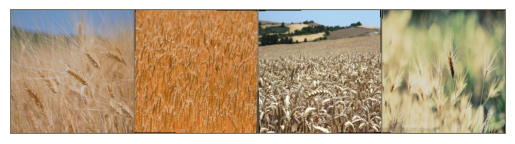

Predicted Labels: ['blast_test', 'blast_test', 'blast_test', 'blast_test']
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_tes

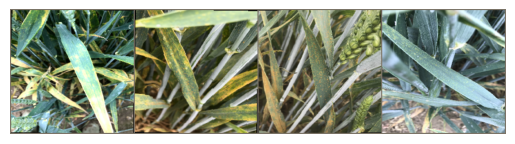

Predicted Labels: ['brown_rust_test', 'brown_rust_test', 'brown_rust_test', 'brown_rust_test']
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: brown_rust_test, True: brown_rust_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_ro

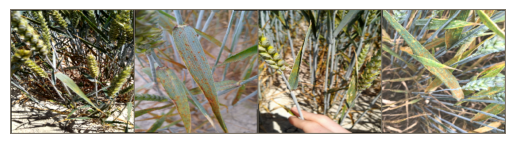

Predicted Labels: ['brown_rust_test', 'brown_rust_test', 'brown_rust_test', 'brown_rust_test']
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predicted: common_root_rot_test, True: common_root_rot_test
Predi

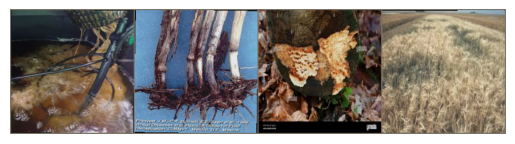

Predicted Labels: ['common_root_rot_test', 'common_root_rot_test', 'common_root_rot_test', 'common_root_rot_test']
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: f

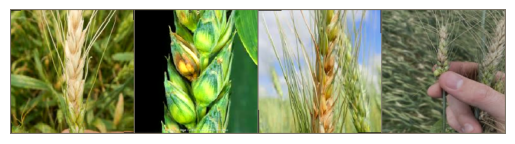

Predicted Labels: ['fusarium_head_blight_test', 'fusarium_head_blight_test', 'fusarium_head_blight_test', 'fusarium_head_blight_test']
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: fusarium_head_blight_test, True: fusarium_head_blight_test
Predicted: aphid_test, Tr

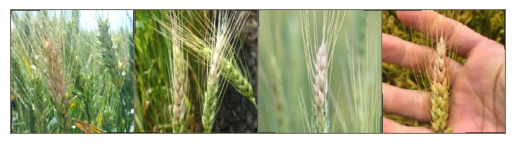

Predicted Labels: ['fusarium_head_blight_test', 'fusarium_head_blight_test', 'fusarium_head_blight_test', 'fusarium_head_blight_test']
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: healthy_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predicted: yellow_rust_test, True: healthy_test
Predi

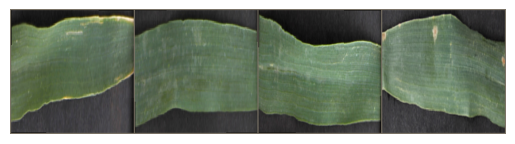

Predicted Labels: ['yellow_rust_test', 'yellow_rust_test', 'yellow_rust_test', 'yellow_rust_test']
Predicted: aphid_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_

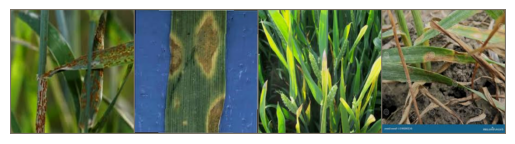

Predicted Labels: ['aphid_test', 'leaf_blight_test', 'leaf_blight_test', 'leaf_blight_test']
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: leaf_blight_test, True: leaf_blight_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mil

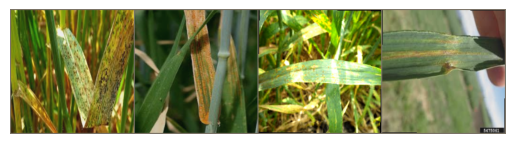

Predicted Labels: ['leaf_blight_test', 'leaf_blight_test', 'leaf_blight_test', 'leaf_blight_test']
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mildew_t

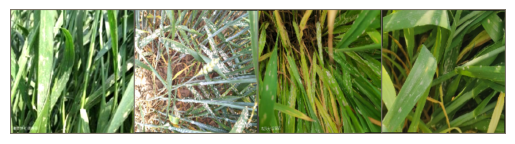

Predicted Labels: ['mildew_test', 'mildew_test', 'mildew_test', 'mildew_test']
Predicted: mildew_test, True: mildew_test
Predicted: mildew_test, True: mildew_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: leaf_blight_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite

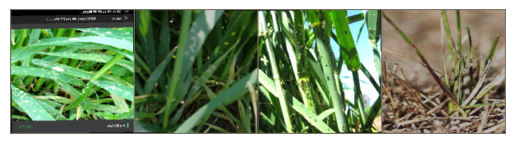

Predicted Labels: ['mildew_test', 'mildew_test', 'mite_test', 'mite_test']
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: mite_test, True: mite_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, T

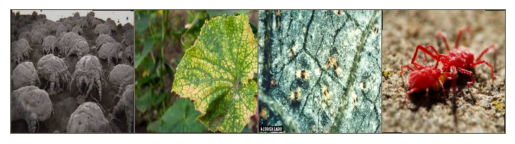

Predicted Labels: ['mite_test', 'mite_test', 'mite_test', 'mite_test']
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: leaf_blight_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predic

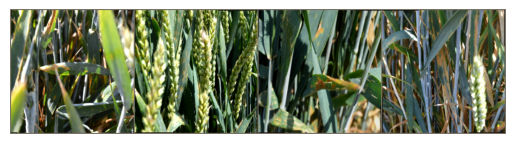

Predicted Labels: ['septoria_test', 'septoria_test', 'septoria_test', 'septoria_test']
Predicted: leaf_blight_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: septoria_test, True: septoria_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True

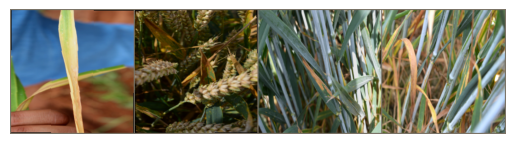

Predicted Labels: ['leaf_blight_test', 'septoria_test', 'septoria_test', 'septoria_test']
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_test
Predicted: smut_test, True: smut_tes

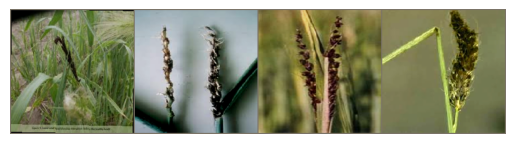

Predicted Labels: ['smut_test', 'smut_test', 'smut_test', 'smut_test']
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted

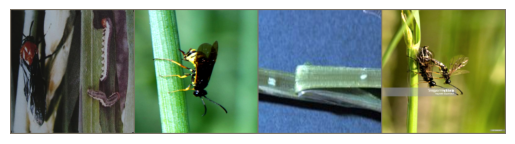

Predicted Labels: ['stem_fly_test', 'stem_fly_test', 'stem_fly_test', 'stem_fly_test']
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: stem_fly_test, True: stem_fly_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: leaf_blight_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_

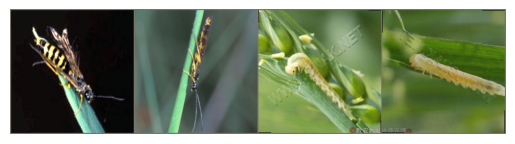

Predicted Labels: ['stem_fly_test', 'stem_fly_test', 'stem_fly_test', 'stem_fly_test']
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: tan_spot_test, True: tan_spot_test
Predicted: leaf_blight_test, True: tan_

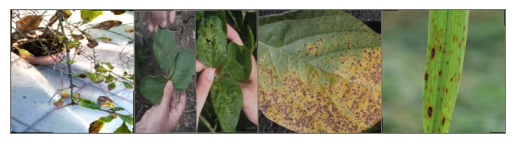

Predicted Labels: ['tan_spot_test', 'tan_spot_test', 'tan_spot_test', 'tan_spot_test']
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, 

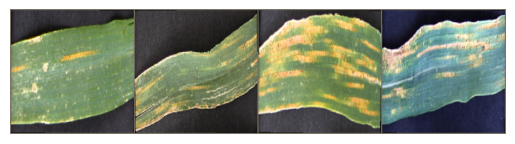

Predicted Labels: ['yellow_rust_test', 'yellow_rust_test', 'yellow_rust_test', 'yellow_rust_test']
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test
Predicted: yellow_rust_test, True: yellow_rust_test


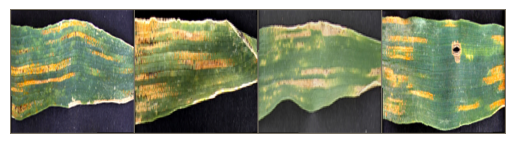

Predicted Labels: ['yellow_rust_test', 'yellow_rust_test', 'yellow_rust_test', 'yellow_rust_test']


In [1]:
import torch
import os
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np


cpDir = '/kaggle/input/model-epoch-48/model_epoch_48'  # Ensure this is the file path to the checkpoint
test_dir = '/kaggle/input/wheat-plant-diseases/data/test'


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(1),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


if os.path.exists(cpDir):
    
    model = models.resnet50(pretrained=False)
    

    num_classes = 15
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
    
    model.load_state_dict(torch.load(cpDir))
    model.eval()  
    print("Model loaded successfully!")
else:
    raise FileNotFoundError(f"Model checkpoint not found at {cpDir}")


dataiter = iter(test_loader)
images, labels = next(dataiter)

def imshow(img):
    """Display a tensor as an image."""
    img = img.numpy().transpose((1, 2, 0))  
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  
    img = np.clip(img, 0, 1)  
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print("Sample test images:")
imshow(torchvision.utils.make_grid(images[:4]))  
print("Labels (True class indices):", labels[:4].numpy())


class_names = test_dataset.classes  

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        
        for i in range(len(preds)):
            print(f"Predicted: {class_names[preds[i]]}, True: {class_names[labels[i]]}")

        
        imshow(torchvision.utils.make_grid(inputs[:4]))  
        print("Predicted Labels:", [class_names[pred] for pred in preds[:4]])

